In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings            
warnings.filterwarnings("ignore")

In [2]:
from nltk.tokenize import RegexpTokenizer
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from textblob import TextBlob, Word, Blobber
from sklearn.neural_network import MLPClassifier
import nltk
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.feature_extraction import text
import re,string,unicodedata
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [4]:
# Load the dataset
file_path = 'sentimentdataset.csv'
SocialMediaFeedback = pd.read_csv(file_path)

In [5]:
SocialMediaFeedback.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [6]:
SocialMediaFeedback.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

In [7]:
SocialMediaFeedback.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1,inplace=True)

In [8]:
SocialMediaFeedback.shape

(732, 13)

In [9]:
SocialMediaFeedback.columns

Index(['Text', 'Sentiment', 'Timestamp', 'User', 'Platform', 'Hashtags',
       'Retweets', 'Likes', 'Country', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')

In [10]:
SocialMediaFeedback.describe()

,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [11]:
SocialMediaFeedback['Sentiment'].value_counts()

 Positive           44
 Joy                42
 Excitement         32
 Neutral            14
 Contentment        14
                    ..
 Adrenaline          1
 Harmony             1
 ArtisticBurst       1
 Radiance            1
 Elegance            1
Name: Sentiment, Length: 279, dtype: int64

In [12]:
SocialMediaFeedback.isnull().sum()

Text         0
Sentiment    0
Timestamp    0
User         0
Platform     0
Hashtags     0
Retweets     0
Likes        0
Country      0
Year         0
Month        0
Day          0
Hour         0
dtype: int64

In [13]:
# Convert timestamps to datetime format
SocialMediaFeedback['Timestamp'] = pd.to_datetime(SocialMediaFeedback['Timestamp'])

# Extract date and time components from the timestamp
SocialMediaFeedback['year'] = SocialMediaFeedback['Timestamp'].dt.year
SocialMediaFeedback['month'] = SocialMediaFeedback['Timestamp'].dt.month
SocialMediaFeedback['day'] = SocialMediaFeedback['Timestamp'].dt.day
SocialMediaFeedback['hour'] = SocialMediaFeedback['Timestamp'].dt.hour


In [14]:
SocialMediaFeedback['Sentiment'] = SocialMediaFeedback['Sentiment'].str.strip()

In [15]:
data = {
    'Sentiment': [
        'Positive', 'Negative', 'Neutral', 'Anger', 'Fear', 'Sadness', 'Disgust',
        'Happiness', 'Joy', 'Love', 'Amusement', 'Enjoyment', 'Admiration', 'Affection',
        'Awe', 'Disappointed', 'Surprise', 'Acceptance', 'Adoration', 'Anticipation',
        'Bitter', 'Calmness', 'Confusion', 'Excitement', 'Kind', 'Pride', 'Shame',
        'Elation', 'Euphoria', 'Contentment', 'Serenity', 'Gratitude', 'Hope',
        'Empowerment', 'Compassion', 'Tenderness', 'Arousal', 'Enthusiasm',
        'Fulfillment', 'Reverence', 'Despair', 'Grief', 'Loneliness', 'Jealousy',
        'Resentment', 'Frustration', 'Boredom', 'Anxiety', 'Intimidation',
        'Helplessness', 'Envy', 'Regret', 'Curiosity', 'Indifference', 'Numbness',
        'Melancholy', 'Nostalgia', 'Ambivalence', 'Determination', 'Zest', 'Hopeful',
        'Proud', 'Grateful', 'Empathetic', 'Compassionate', 'Playful', 'Free-spirited',
        'Inspired', 'Confident', 'Bitterness', 'Yearning', 'Fearful', 'Apprehensive',
        'Overwhelmed', 'Jealous', 'Devastated', 'Frustrated', 'Envious', 'Dismissive',
        'Thrill', 'Bittersweet', 'Overjoyed', 'Inspiration', 'Motivation',
        'Contemplation', 'JoyfulReunion', 'Satisfaction', 'Blessed', 'Reflection',
        'Appreciation', 'Confidence', 'Accomplishment', 'Wonderment', 'Optimism',
        'Enchantment', 'Intrigue', 'PlayfulJoy', 'Mindfulness', 'DreamChaser',
        'Elegance', 'Whimsy', 'Pensive', 'Harmony', 'Creativity', 'Radiance', 'Wonder',
        'Rejuvenation', 'Coziness', 'Adventure', 'Melodic', 'FestiveJoy', 'InnerJourney',
        'Freedom', 'Dazzle', 'Adrenaline', 'ArtisticBurst', 'CulinaryOdyssey',
        'Resilience', 'Immersion', 'Spark', 'Marvel', 'Heartbreak',
        'Betrayal', 'Suffering', 'EmotionalStorm', 'Isolation', 'Disappointment',
        'LostLove', 'Exhaustion', 'Sorrow', 'Darkness', 'Desperation', 'Ruins',
        'Desolation', 'Loss', 'Heartache', 'Solitude', 'Positivity', 'Kindness',
        'Friendship', 'Success', 'Exploration', 'Amazement', 'Romance', 'Captivation',
        'Tranquility', 'Grandeur', 'Emotion', 'Energy', 'Celebration', 'Charm',
        'Ecstasy', 'Colorful', 'Hypnotic', 'Connection', 'Iconic', 'Journey',
        'Engagement', 'Touched', 'Suspense', 'Triumph', 'Heartwarming', 'Obstacle',
        'Sympathy', 'Pressure', 'Renewed Effort', 'Miscalculation', 'Challenge',
        'Solace', 'Breakthrough', 'Joy in Baking', 'Envisioning History',
        'Imagination', 'Vibrancy', 'Mesmerizing', 'Culinary Adventure',
        'Winter Magic', 'Thrilling Journey', "Nature's Beauty", 'Celestial Wonder',
        'Creative Inspiration', 'Runway Creativity', "Ocean's Freedom",
        'Whispers of the Past', 'Relief', 'Embarrassed', 'Mischievous', 'Sad', 'Hate',
        'Bad', 'Happy'
    ]
}

df = pd.DataFrame(data)

# Define a function to categorize sentiments into 'Neutral', 'Positive', or 'Negative'
def categorize_sentiment(sentiment):
    if sentiment in ['Neutral', 'Calmness', 'Indifference', 'Numbness', 'Boredom', 'Confusion']:
        return 'Neutral'
    elif sentiment in ['Positive', 'Happiness', 'Joy', 'Love', 'Amusement', 'Enjoyment',
                       'Admiration', 'Affection', 'Awe', 'Surprise', 'Acceptance',
                       'Adoration', 'Anticipation', 'Kind', 'Pride', 'Elation', 'Euphoria',
                       'Contentment', 'Serenity', 'Gratitude', 'Hope', 'Empowerment',
                       'Compassion', 'Tenderness', 'Arousal', 'Enthusiasm', 'Fulfillment',
                       'Reverence', 'Confidence', 'Accomplishment', 'Wonderment', 'Optimism',
                       'Enchantment', 'Intrigue', 'Playful', 'Free-spirited', 'Inspired',
                       'Confident', 'Excitement', 'Zest', 'Hopeful', 'Proud', 'Grateful',
                       'Empathetic', 'Compassionate', 'PlayfulJoy', 'Mindfulness', 'DreamChaser',
                       'Elegance', 'Whimsy', 'Harmony', 'Creativity', 'Radiance', 'Wonder',
                       'Rejuvenation', 'Adventure', 'Melodic', 'FestiveJoy', 'InnerJourney',
                       'Freedom', 'Dazzle', 'Adrenaline', 'ArtisticBurst', 'CulinaryOdyssey',
                       'Resilience', 'Immersion', 'Spark', 'Marvel', 'Celebration', 'Charm',
                       'Ecstasy', 'Colorful', 'Hypnotic', 'Connection', 'Iconic', 'Journey',
                       'Engagement', 'Touched', 'Triumph', 'Heartwarming', 'Relief', 'Embarrassed',
                       'Mischievous', 'Happy']:
        return 'Positive'
    else:
        return 'Negative'

# Apply categorization function to Sentiment column
SocialMediaFeedback['Sentiment_Category'] = SocialMediaFeedback['Sentiment'].apply(categorize_sentiment)

# Print the resulting DataFrame with Sentiment and its category
print(SocialMediaFeedback[['Sentiment', 'Sentiment_Category']])

    Sentiment Sentiment_Category
0    Positive           Positive
1    Negative           Negative
2    Positive           Positive
3    Positive           Positive
4     Neutral            Neutral
..        ...                ...
727     Happy           Positive
728     Happy           Positive
729     Happy           Positive
730     Happy           Positive
731     Happy           Positive

[732 rows x 2 columns]


In [16]:
# Display the distribution of sentiments
sentiment_counts = SocialMediaFeedback['Sentiment'].value_counts()
print("Sentiment Distribution:")
print(sentiment_counts)

Sentiment Distribution:
Positive          45
Joy               44
Excitement        37
Contentment       19
Neutral           18
                  ..
LostLove           1
EmotionalStorm     1
Suffering          1
Bittersweet        1
Intrigue           1
Name: Sentiment, Length: 191, dtype: int64


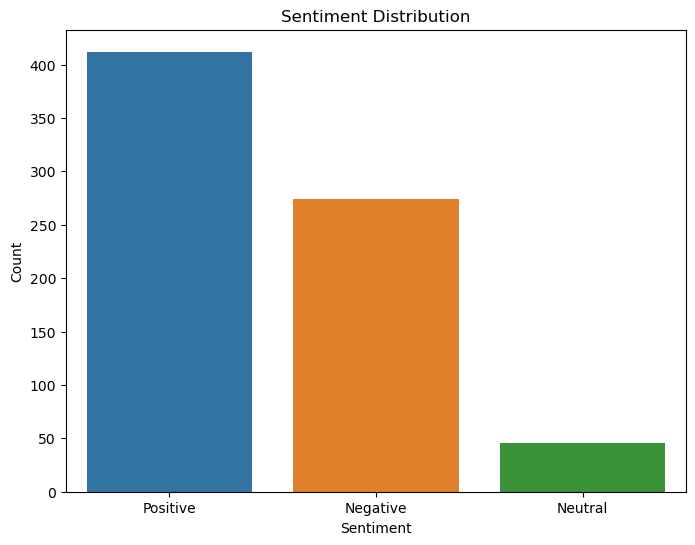

In [17]:
# Plotting the sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment_Category', data=SocialMediaFeedback)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

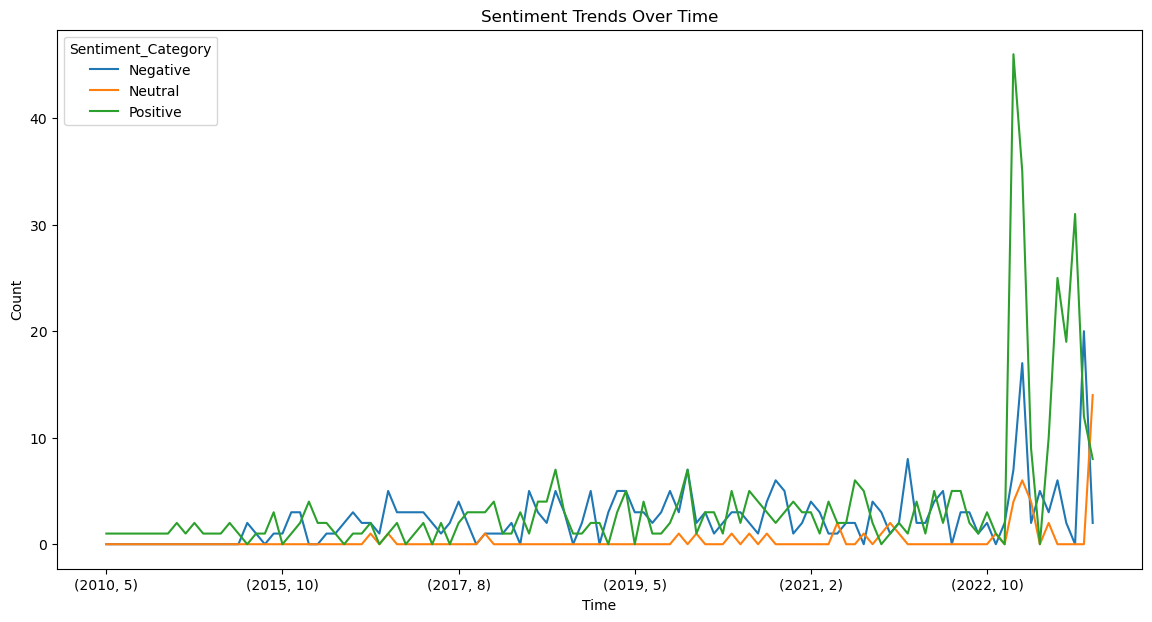

In [18]:
# Trend Analysis: Sentiment over time
sentiment_over_time = SocialMediaFeedback.groupby(['year', 'month'])['Sentiment_Category'].value_counts().unstack().fillna(0)
sentiment_over_time.plot(kind='line', figsize=(14, 7))
plt.title('Sentiment Trends Over Time')
plt.xlabel('Time')
plt.ylabel('Count')
plt.show()

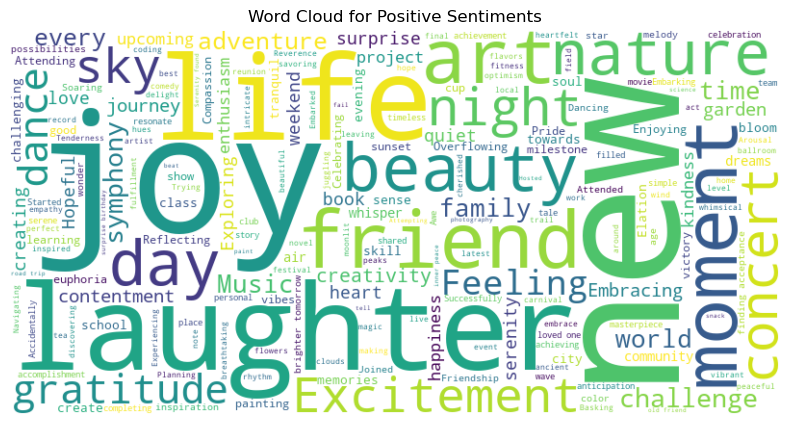

In [19]:
# Generating a Word Cloud for Positive Sentiments
positive_texts = ' '.join(SocialMediaFeedback[SocialMediaFeedback['Sentiment_Category'] == 'Positive']['Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_texts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiments')
plt.axis('off')
plt.show()

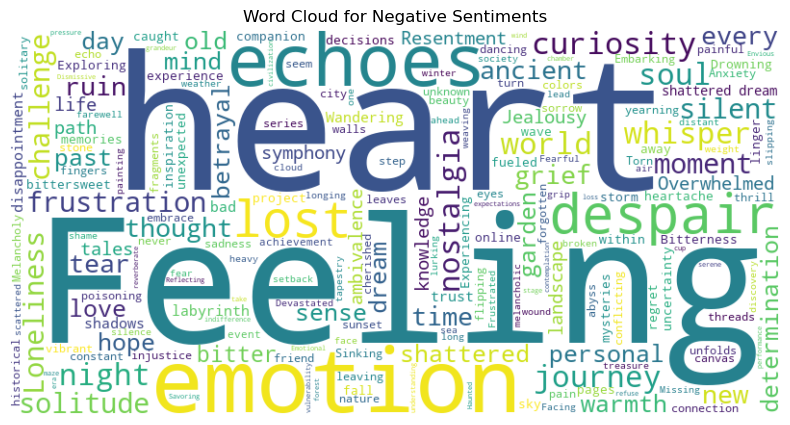

In [20]:
# Generating a Word Cloud for Negative Sentiments
negative_texts = ' '.join(SocialMediaFeedback[SocialMediaFeedback['Sentiment_Category'] == 'Negative']['Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_texts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Sentiments')
plt.axis('off')
plt.show()

# Spltting into train and test

In [21]:
WebsiteDataAnalysis=SocialMediaFeedback[['Text','Sentiment_Category']]

In [22]:
WebsiteDataAnalysis.head()

,Text,Sentiment_Category
0,Enjoying a beautiful day at the park! ...,Positive
1,Traffic was terrible this morning. ...,Negative
2,Just finished an amazing workout! 💪 ...,Positive
3,Excited about the upcoming weekend getaway! ...,Positive
4,Trying out a new recipe for dinner tonight. ...,Neutral


In [23]:
WebsiteDataAnalysis.shape

(732, 2)

In [24]:
train,test = train_test_split(WebsiteDataAnalysis,test_size = 0.25,random_state=0,stratify = WebsiteDataAnalysis.Sentiment_Category)
print("train shape : ", train.shape)
print("valid shape : ", test.shape)

train shape :  (549, 2)
valid shape :  (183, 2)


In [25]:
WebsiteDataAnalysis.Sentiment_Category.value_counts()

Positive    412
Negative    274
Neutral      46
Name: Sentiment_Category, dtype: int64

In [26]:
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.Text.values)
X_test = vectorizer.transform(test.Text.values)

y_train = train.Sentiment_Category.values
y_test = test.Sentiment_Category.values

# Random Forest Classifier

In [27]:
Random_forest = RandomForestClassifier()

In [28]:
Random_forest.fit(X_train,y_train)

RandomForestClassifier()

In [29]:
Random_forest_prediction = Random_forest.predict(X_test)

In [30]:
RF_accuracy = accuracy_score(y_test,Random_forest_prediction)*100
print(" accuracy Score : ",RF_accuracy )

 accuracy Score :  74.31693989071039


In [31]:
print(classification_report(y_test,Random_forest_prediction))

              precision    recall  f1-score   support

    Negative       0.92      0.49      0.63        68
     Neutral       1.00      0.17      0.29        12
    Positive       0.70      0.98      0.81       103

    accuracy                           0.74       183
   macro avg       0.87      0.54      0.58       183
weighted avg       0.80      0.74      0.71       183



In [32]:
confusion_matrix(y_test,Random_forest_prediction)

array([[ 33,   0,  35],
       [  1,   2,   9],
       [  2,   0, 101]], dtype=int64)

## Logistic Regression

In [33]:
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)

In [34]:
lr=lr.fit(X_train,y_train)

In [35]:
lr_predict=lr.predict(X_test)

In [36]:
lr_score=accuracy_score(y_test,lr_predict)*100

In [37]:
lr_score

82.5136612021858

In [38]:
print(classification_report(y_test,lr_predict))

              precision    recall  f1-score   support

    Negative       0.88      0.75      0.81        68
     Neutral       1.00      0.25      0.40        12
    Positive       0.80      0.94      0.86       103

    accuracy                           0.83       183
   macro avg       0.89      0.65      0.69       183
weighted avg       0.84      0.83      0.81       183



In [39]:
confusion_matrix(y_test,lr_predict)

array([[51,  0, 17],
       [ 1,  3,  8],
       [ 6,  0, 97]], dtype=int64)

# Naive Bayes

In [40]:
naiveByes = MultinomialNB()
naiveByes.fit(X_train,y_train)

MultinomialNB()

In [41]:
naiveByes_prediction = naiveByes.predict(X_test)

In [42]:
naiveByes_accuracy = accuracy_score(y_test,naiveByes_prediction)*100
print(" accuracy Score : ",naiveByes_accuracy)

 accuracy Score :  82.5136612021858


In [43]:
print(classification_report(naiveByes_prediction,y_test))

              precision    recall  f1-score   support

    Negative       0.79      0.82      0.81        66
     Neutral       0.42      0.83      0.56         6
    Positive       0.89      0.83      0.86       111

    accuracy                           0.83       183
   macro avg       0.70      0.83      0.74       183
weighted avg       0.84      0.83      0.83       183



In [44]:
print(confusion_matrix(naiveByes_prediction,y_test))

[[54  1 11]
 [ 1  5  0]
 [13  6 92]]


In [45]:
# Initialize and Train the MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

MLPClassifier(max_iter=500, random_state=42)

In [46]:
# Predict on the test set
mlp_predictions = mlp_model.predict(X_test)

In [47]:
# Calculate accuracy score
mlp_accuracy = accuracy_score(y_test, mlp_predictions) * 100
print("MLP accuracy score: ", mlp_accuracy)

MLP accuracy score:  80.32786885245902


In [49]:
# Display the classification report
print(classification_report(y_test, mlp_predictions))

              precision    recall  f1-score   support

    Negative       0.82      0.75      0.78        68
     Neutral       0.80      0.33      0.47        12
    Positive       0.79      0.89      0.84       103

    accuracy                           0.80       183
   macro avg       0.81      0.66      0.70       183
weighted avg       0.80      0.80      0.80       183



In [50]:
# Plot the confusion matrix
print(confusion_matrix(y_test, mlp_predictions))

[[51  0 17]
 [ 1  4  7]
 [10  1 92]]


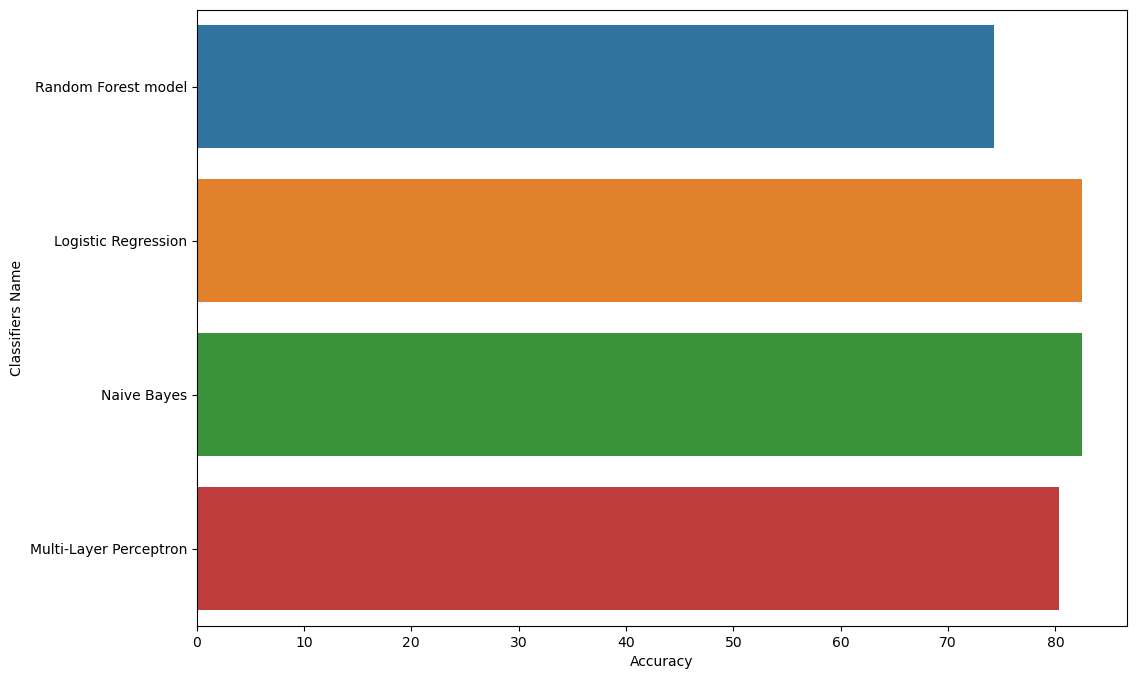

In [51]:
data_accu = [['Random Forest model', RF_accuracy], ['Logistic Regression', 
                                                  lr_score],['Naive Bayes',naiveByes_accuracy],
            ['Multi-Layer Perceptron', mlp_accuracy]]
df_accu = pd.DataFrame(data_accu, columns=['Classifiers Name', 'Accuracy'])
plt.figure(figsize=(12,8))
sns.barplot(x='Accuracy', y='Classifiers Name', data = df_accu)
plt.show()